<a href="https://colab.research.google.com/github/badrinarayanan02/Computer-Vision/blob/main/2348507_NonLinearSpatialFiltering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Non Linear Spatial Filtering**

Implementing Non-Linear Spatial Filtering using Built-in and user defined functions

1) Midpoint Filter
2) Alpha trimmed Filter

# Midpoint Filter

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def midpointFilter(image, kernel_size):
    k = kernel_size // 2
    padded_image = cv2.copyMakeBorder(image, k, k, k, k, cv2.BORDER_REFLECT)
    result = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            local_region = padded_image[i:i+2*k+1, j:j+2*k+1]
            min_val = np.min(local_region)
            max_val = np.max(local_region)
            result[i, j] = (min_val + max_val) / 2
    return result

In [58]:
image = cv2.imread('/content/0_5mRwGeRafy5Q8t4R.jpg', 0)
filtered_image = midpointFilter(image, 3)

<ipython-input-30-ade165e3cf81>:11: RuntimeWarning: overflow encountered in scalar add
  result[i, j] = (min_val + max_val) / 2


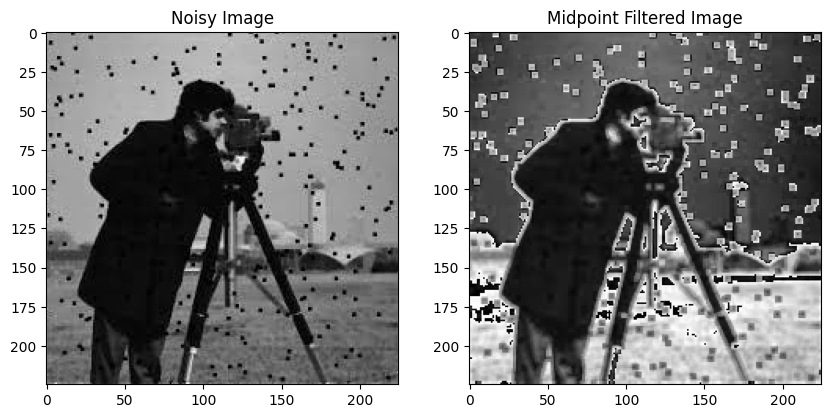

In [59]:
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Noisy Image')
plt.subplot(122), plt.imshow(filtered_image, cmap='gray'), plt.title('Midpoint Filtered Image')
plt.show()

**Inference**

Gave a noisy input image, and applied midpoint filtering to remove the noise.

# Alpha Trimmed Filter

In [60]:
def alphaTrimmedMeanFilter(image, kernel_size, d):
    k = kernel_size // 2
    alpha = d // 2
    padded_image = cv2.copyMakeBorder(image, k, k, k, k, cv2.BORDER_REFLECT)
    result = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            local_region = padded_image[i:i+2*k+1, j:j+2*k+1]
            flattened = np.sort(local_region, axis=None)
            trimmed = flattened[alpha:-alpha] if alpha > 0 else flattened
            result[i, j] = np.mean(trimmed)
    return result


In [61]:
image = cv2.imread('/content/images.jpeg', 0)
filtered_image = alphaTrimmedMeanFilter(image, 3, 2)

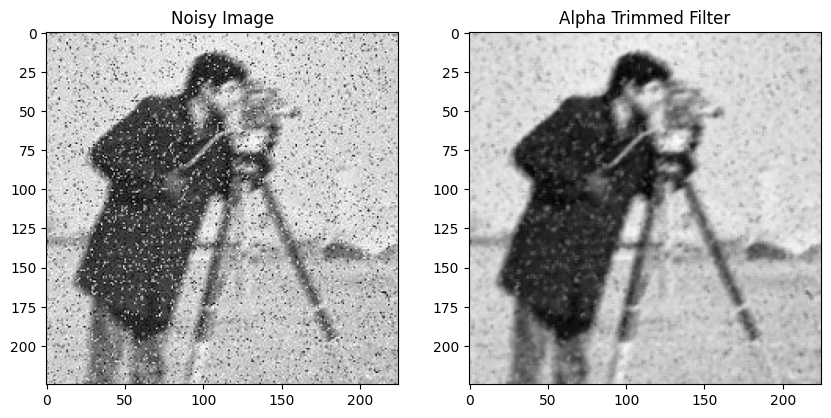

In [63]:
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Noisy Image')
plt.subplot(122), plt.imshow(filtered_image, cmap='gray'), plt.title('Alpha Trimmed Filter')
plt.show()

**Inference**

Applied alpha trimmed filter on the noisy image. It reduced the salt and pepper noise that was in the input image. When comparing to midpoint, alpha trimmed mean filter gave a great performance.

The alpha-trimmed mean filter works by ignoring the smallest and largest values in the neighborhood and averaging the remaining values.

# **Conclusion**

Thus the given task to perform non linear spatial filtering techniques like midpoint filter and alpha trimmed filter has been implemented successfully. Gave a noisy image as input both the filter worked well in order to remove the salt and pepper noise. But when comparing to both the filters, alpha trimmed mean filter was good.